/var/folders/01/c_1q1nmd6xj9htpk8cfsr_vc0000gn/T/ipykernel_94988/3342903770.py:14: RuntimeWarning: divide by zero encountered in divide
  r_ij = np.where(distances != 0., 1.0 / distances, 0)


[3.12535480e+01 2.43580281e+01 7.51682373e+00 6.20523048e+00
 1.83595157e+00 5.42714083e-01 1.02814902e-01 1.58131050e-02
 2.35240550e-03 2.96300583e-04 2.96870494e-05 3.63827631e-06
 2.62753848e-07 2.72500483e-08 1.72477137e-09 1.42989593e-10
 8.12161157e-12 5.85428368e-13 9.17299510e-14 6.71728109e-14
 5.28395339e-14 4.66435836e-14 4.07782334e-14 3.76977387e-14
 3.64877959e-14 3.11702665e-14 3.03031364e-14 2.77587268e-14
 2.27474235e-14 1.95464657e-14 1.85321669e-14 1.38885018e-14
 1.31659699e-14 1.30215513e-14 9.75238965e-15 8.50362071e-15
 7.30567813e-15 6.92622772e-15 6.15495780e-15 5.14163500e-15
 3.65926322e-15 2.63751770e-15 2.08620800e-15 2.08620800e-15
 2.08620800e-15 2.08620800e-15 2.08620800e-15 2.08620800e-15
 2.08620800e-15 2.08620800e-15 2.08620800e-15 2.08620800e-15
 2.08620800e-15 2.08620800e-15 2.08620800e-15 2.08620800e-15
 2.08620800e-15 2.08620800e-15 2.08620800e-15 2.08620800e-15
 2.08620800e-15 2.08620800e-15 2.08620800e-15 2.08620800e-15
 2.08620800e-15 2.086208

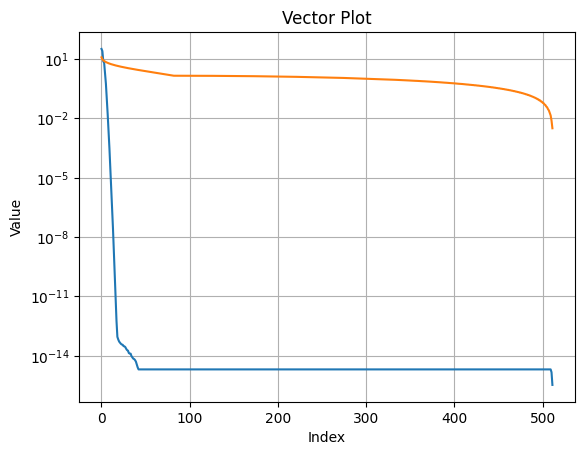

In [2]:
import numpy as np
from qutree import *

# Example positions along the x-axis (1D grid)
n = 9
positions = linspace(0, 2**(n), 2**n)

# Calculate pairwise distances |x_i - x_j|
# np.newaxis creates a new axis so that subtraction is done between each pair of positions
distances = np.abs(positions[:, np.newaxis] - positions)

# Compute r_ij = 1/|x_i - x_j|, avoiding division by zero by setting these to zero for now
# Use np.where to avoid division by zero
r_ij = np.where(distances != 0., 1.0 / distances, 0)
U1, S1, V1 = np.linalg.svd(r_ij)
#print(r_ij)

r_ij = r_ij.reshape([2]*n + [2]*n)
y = [i for pair in zip(range(n), range(n, 2*n)) for i in pair]
r_ij = np.transpose(r_ij, y)
r_ij = r_ij.reshape(2**n, 2**n)
U, S, V = np.linalg.svd(r_ij)
print(S[:100])

import matplotlib.pyplot as plt
plt.figure()
plt.plot(S)
plt.plot(S1)
plt.xlabel('Index')
plt.ylabel('Value')
plt.yscale('log')
plt.title('Vector Plot')
plt.grid(True)
plt.show()

In [3]:
#%pip install pyscf
from pyscf import gto, df

N = 128
atom = ''
for i in range(N):
    atom += 'H 0 0 %f;\n' % (i*1.)

#mol = gto.M(atom='N 0 0 0; N 0 0 1.2', basis='def2-tzvp')
mol = gto.M(atom=atom, basis='sto-3g')
auxmol = df.addons.make_auxmol(mol)
pqa = np.array(df.incore.aux_e2(mol, auxmol))
print(pqa.shape)

(128, 128, 2304)


[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2304]
[0, 7, 1, 8, 2, 9, 3, 10, 4, 11, 5, 12, 6, 13, 14]
(128, 128, 2304)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[0, 7, 1, 8, 2, 9, 3, 10, 4, 11, 5, 12, 6, 13]


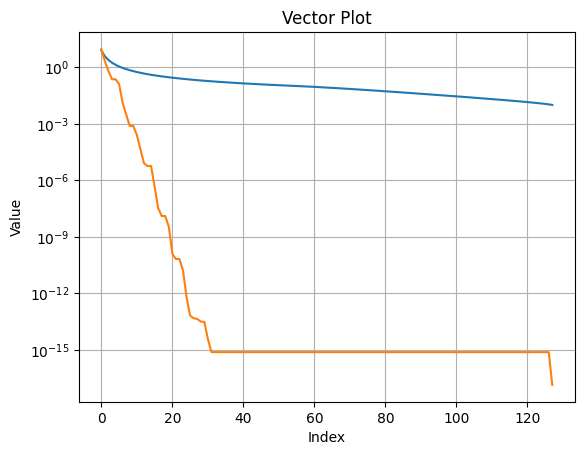

In [4]:
def zippose(X):
    N = X.shape[0]
    n = int(np.log2(N))
    if 2**n != N:
        raise ValueError('Input matrix must be a power of 2')
    X = X.reshape([2]*n + [2]*n)
    y = [i for pair in zip(range(n), range(n, 2*n)) for i in pair]
    X = np.transpose(X, y)
    print(list(range(2*n)))
    print(y)
    X = X.reshape(2**n, 2**n)
    return X

def zippose3(X):
    N = X.shape[0]
    N2 = X.shape[1]
    if N != N2:
        raise ValueError('Input matrix must be square')
    n = int(np.log2(N))
    if 2**n != N:
        raise ValueError('Input matrix must be a power of 2')
    M = X.shape[2]

    X = X.reshape([2]*n + [2]*n + [M])
    y = [i for pair in zip(range(n), range(n, 2*n)) for i in pair]
    y += [2*n]
    print([2]*n + [2]*n + [M])
    print(y)
    X = np.transpose(X, y)
    X = X.reshape(2**n, 2**n, M)
    return X

Z = zippose3(pqa)
print(Z.shape)
#Z = Z.reshape(128, 128*2304)
#Z2 = Z.T @ Z
#U, S, V = np.linalg.svd(Z2)
#print(S)

X = pqa[:, :, 1]
Y = zippose(X)
Uy, sy, Vy = np.linalg.svd(Y)
Ux, sx, Vx = np.linalg.svd(X)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(sx)
plt.plot(sy)
plt.xlabel('Index')
plt.ylabel('Value')
plt.yscale('log')
plt.title('Vector Plot')
plt.grid(True)
plt.show()

In [5]:
from pyscf import scf
N = 16
atom = ''
for i in range(N):
    atom += 'H 0 0 %f;\n' % (i*1.)

#mol = gto.M(atom='N 0 0 0; N 0 0 1.2', basis='def2-tzvp')
mol = gto.M(atom=atom, basis='6-31g')
mf = scf.RHF(mol)
mf.run()
eri = mf.mol.intor('int2e')

def zippose_4(X):
    N = X.shape[0]
    n = int(np.log2(N))
    if 2**n != N:
        raise ValueError('Input matrix must be a power of 2')
    X = X.reshape([2]*n*4)
    y = [i for pair in zip(range(n), range(n, 2*n), range(2*n, 3*n), range(3*n, 4*n)) for i in pair]
    print(y)
    X = np.transpose(X, y)
    X = X.reshape(2**(2*n), 2**(2*n))
    return X

Y = zippose_4(eri)
print('Y = ', Y.shape)
Uy, sy, Vy = np.linalg.svd(Y)
#Ux, sx, Vx = np.linalg.svd(Y.reshape(N, N*N*N))
Ux, sx, Vx = np.linalg.svd(eri.reshape(4*N*N, 4*N*N))
print('sy = ', sy[:50])
print('sx = ', sx[:50])

converged SCF energy = -8.56985972018605
[0, 5, 10, 15, 1, 6, 11, 16, 2, 7, 12, 17, 3, 8, 13, 18, 4, 9, 14, 19]
Y =  (1024, 1024)
sy =  [16.74903936  5.94727915  4.91307381  4.13777751  3.86902402  3.82573344
  1.89424117  1.68611459  1.44295477  1.20855296  1.19597001  1.13987354
  0.99508989  0.98473914  0.98398192  0.91708799  0.87868486  0.87543175
  0.28184669  0.23454762  0.20267056  0.20246422  0.19215651  0.17343575
  0.17334847  0.14255508  0.14225732  0.1305222   0.1259745   0.12551623
  0.11249892  0.11090282  0.10864482  0.08846694  0.08637281  0.08570938
  0.085517    0.06577381  0.05726293  0.05142014  0.04865254  0.04792516
  0.04513647  0.04426014  0.0287606   0.02549102  0.02339224  0.02324327
  0.01746078  0.01696991]
sx =  [1.51637887e+01 8.82083147e+00 6.32069108e+00 4.69824204e+00
 3.61124451e+00 2.80539682e+00 2.21562288e+00 1.76319197e+00
 1.42223489e+00 1.15820012e+00 9.57741058e-01 8.03853325e-01
 6.89323997e-01 6.05795664e-01 5.49515345e-01 5.16831981e-01
 2.4

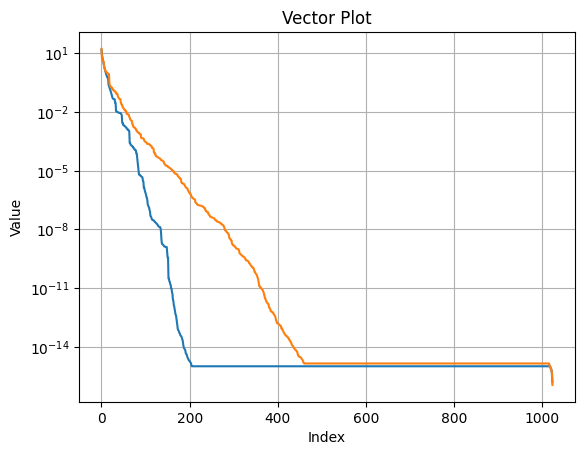

In [6]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(sx)
plt.plot(sy)
plt.xlabel('Index')
plt.ylabel('Value')
plt.yscale('log')
plt.title('Vector Plot')
plt.grid(True)
plt.show()

In [8]:
from qutree import *

def zippose(X):
    N = X.shape[0]
    n = int(np.log2(N))
    if 2**n != N:
        raise ValueError('Input matrix must be a power of 2')
    X = X.reshape([2]*n + [2]*n)
    y = [i for pair in zip(range(n), range(n, 2*n)) for i in pair]
    X = np.transpose(X, y)
    X = X.reshape(2**n, 2**n)
    return X

n = 5
N = 2**n
L = 1
x0 = Grid(linspace(0, L, N), [0])
x1 = Grid(linspace(0, L, N), [1])
x2 = Grid(linspace(0, L, N), [2])
x3 = Grid(linspace(0, L, N), [3])
xs = x0 @ x1 @ x2 @ x3

def Coulomb(x):
    return 1. / (np.sqrt((x[0]-x[2])**2 + (x[1] - x[3])**2) + 1e-6)

#r = xs.evaluate(Coulomb)
#r = r.reshape((N, N, N, N))
#r = zippose_4(r)
r = r.reshape(N**2, N**2)
print(r.shape)
U, s, V = np.linalg.svd(r, full_matrices=False)
print(n, N, N**4)
print(s)
print(i, len(s[s[:]>1e-8]))

(1024, 1024)
5 32 1048576
[1.60003467e+07 1.59999095e+07 1.59999095e+07 ... 1.00613153e-09
 6.05633685e-10 2.35156489e-10]
15 102


In [50]:

def zippose(X):
    N = X.shape[0]
    n = int(np.log2(N))
    if 2**n != N:
        raise ValueError('Input matrix must be a power of 2')
    X = X.reshape([2]*n + [2]*n)
    y = [i for pair in zip(range(n), range(n, 2*n)) for i in pair]
    X = np.transpose(X, y)
    X = X.reshape(2**n, 2**n)
    return X

n = 4
N = 2**n
L = 1
x0 = Grid(linspace(0, L, N), [0])
x1 = Grid(linspace(0, L, N), [1])
xs = x0 @ x1

def Coulomb(x):
    return 1. / (np.sqrt((x[0]-x[1])**2) + 1e-6)

r = xs.evaluate(Coulomb)
r = r.reshape((N, N))
r = zippose(r)
#r = r.reshape(N, N**2)
print(r.shape)
U, s, V = np.linalg.svd(r, full_matrices=False)
print(n, N, N**4)
print(s)
print(i, len(s[s[:]>1e-8]))

(16, 16)
4 16 65536
[4.00000000e+06 5.08433826e+01 2.80777155e+01 3.99806995e+00
 8.68648061e-01 3.09399306e-02 4.02924417e-03 3.01195374e-10
 1.50914629e-15 8.42133140e-16 2.58831237e-16 7.04489563e-17
 1.52446660e-20 7.64057376e-32 2.21951505e-32 1.81360530e-48]
15 7


In [52]:
from qutree import *

def binary_to_int(bin):
    i = 0
    for k, j in enumerate(bin):
        i += j * 2**k
    return i

def transform(x):
    m = 2
    n = int(len(x))
    i = list(range(0, n, m))
    j = list(range(1, n, m))
    return x[i], x[j]

def Coulomb_bin(bin):
    x, y = transform(bin)
    x = binary_to_int(x)
    y = binary_to_int(y)
    return 1. / (np.abs((x - y)) + 1e-4)

N = 2
r = 2
f = 8
primitive_grid = [[0, 1]] * f
O = Objective(Coulomb_bin, primitive_grid)
G = tensor_train_graph(f, r, N)
G = tn_grid(G, O.linspace)
Gopt, df = ttnopt(G, O)
Gt = tn_to_tensor(Gopt)
Gt.reshape(16, 16)
print(Gt.shape)

(256,)
